### UNIVERSIDAD SANTO TOMÁS
### Taller 2: Árboles y redes
#### Gabriela Cortés Merchán
##### Código: 2229034

### Network-redes

La base que se utilizó  para el taller provenía de una página de datos abiertos, esta página corresponde a [Datos de la red](http://www-personal.umich.edu/~mejn/netdata/), la cual contiene enlaces de conjuntos de datos de red que se a recopilado a lo largo de los años, todas las bases que se encuentran en esta pagina son gratuitas y para uso científico, todos estos datos provienen de un formato gml, adicionalmente, la pagina menciona que estos datos deben citarse como [Valdis  Krebs](http://www.orgnet.com/).


Esta base   contiene datos de la red de libros sobre política estadounidense que se publicaron alrededor de la época de las elecciones presidenciales de 2004 y que los mismos compradores compraron conjuntamente. Estos datos fueron [copilados y analizados originalmente por Valdis Krebs](http://www.orgnet.com/divided2.html) y su  creador fue  "Mark Newman on Wed Oct 18 16:42:04 2006".


Por otra parte los nodos representan libros sobre política estadounidense vendidos en línea:


+  Nodos: Los nodos contienen 105 títulos de libros políticos diferentes, a los nodos se les han dado valores "l", "n" o "c" para indicar si son "liberal", "neutral" o "conservador", estas alineaciones fueron asignadas por separado por Mark Newman basado en una lectura de las descripciones y reseñas de los libros publicados.


+  Bordes: Los bordes  contienen 441 relaciones no ponderadas entre esos libros, que representan la compra conjunta del mismo comprador - No ponderado no dirigido.


La red revela y sugiere patrones potenciales sobre las comunidades de personas que compran estos libros. También cuestiona cómo las formas de consumo de medios pueden influir, dar forma, reforzar o reflejar la polarización política nacional.


### Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
from pyvis.network import Network
import pandas as pd

### Importar dataset

El objetivo es realizar una visualización de tipo de datos árboles y redes basados en el framework de Tamara para lograr la compresión de todos los componentes claves aprendidos en clase. Para ello el estudiante debe seleccionar un dataset y realizar una visualización de tipo árbol o tipo red con su respectivo análisis.

In [2]:
g = nx.read_gml('C:/Users/Gabriela C/Desktop/Semestre 8/polbooks/polbooks.gml')
print("Número de nodos:", g.number_of_nodes())
print("Número de nodos:", g.number_of_edges())

Número de nodos: 105
Número de nodos: 441


#### Listado de lo que contiene los nodos

In [3]:
list(g.nodes)

['1000 Years for Revenge',
 'Bush vs. the Beltway',
 "Charlie Wilson's War",
 'Losing Bin Laden',
 'Sleeping With the Devil',
 'The Man Who Warned America',
 'Why America Slept',
 'Ghost Wars',
 'A National Party No More',
 'Bush Country',
 'Dereliction of Duty',
 'Legacy',
 'Off with Their Heads',
 'Persecution',
 "Rumsfeld's War",
 'Breakdown',
 'Betrayal',
 'Shut Up and Sing',
 'Meant To Be',
 'The Right Man',
 'Ten Minutes from Normal',
 "Hillary's Scheme",
 'The French Betrayal of America',
 'Tales from the Left Coast',
 'Hating America',
 'The Third Terrorist',
 'Endgame',
 'Spin Sisters',
 "All the Shah's Men",
 'Dangerous Dimplomacy',
 'The Price of Loyalty',
 'House of Bush, House of Saud',
 'The Death of Right and Wrong',
 'Useful Idiots',
 "The O'Reilly Factor",
 'Let Freedom Ring',
 'Those Who Trespass',
 'Bias',
 'Slander',
 'The Savage Nation',
 'Deliver Us from Evil',
 'Give Me a Break',
 'The Enemy Within',
 'The Real America',
 "Who's Looking Out for You?",
 'The Offic

#### Listado de lo que contiene los  bordes 

In [4]:
list(g.edges)

[('1000 Years for Revenge', 'Bush vs. the Beltway'),
 ('1000 Years for Revenge', "Charlie Wilson's War"),
 ('1000 Years for Revenge', 'Losing Bin Laden'),
 ('1000 Years for Revenge', 'Sleeping With the Devil'),
 ('1000 Years for Revenge', 'The Man Who Warned America'),
 ('1000 Years for Revenge', 'Why America Slept'),
 ('Bush vs. the Beltway', 'Losing Bin Laden'),
 ('Bush vs. the Beltway', 'The Man Who Warned America'),
 ('Bush vs. the Beltway', 'Why America Slept'),
 ("Charlie Wilson's War", 'Sleeping With the Devil'),
 ("Charlie Wilson's War", 'The Man Who Warned America'),
 ("Charlie Wilson's War", 'Ghost Wars'),
 ('Losing Bin Laden', 'The Man Who Warned America'),
 ('Losing Bin Laden', 'A National Party No More'),
 ('Losing Bin Laden', 'Bush Country'),
 ('Losing Bin Laden', 'Dereliction of Duty'),
 ('Losing Bin Laden', 'Legacy'),
 ('Losing Bin Laden', 'Off with Their Heads'),
 ('Losing Bin Laden', 'Persecution'),
 ('Losing Bin Laden', "Rumsfeld's War"),
 ('Losing Bin Laden', 'Break

•	**¿Qué es lo que espero?**

Lo que espero de este modismo de redes es poder encontrar:


1.  Si hay algún patrón  entre los nodos 
2.  Identificar los enlaces de conexión entre nodos 


###  __Framework de la visualización__

###  __Framework de la visualización__

#### ¿Qué?


Por lo anterior el ¿qué? del Framework de Tamara se encuentra evidenciado en que este Dataset cuenta con ítems categóricos  que corresponden a los  títulos de libros políticos, liberales, neutrales y conservadores, que en este caso son nodos, adicionalmente, cuenta con links que en este caso son los enlaces o bordes, los cuales nos van a indicar la conexión que tiene un libro con respecto a otro, es decir,  la conexión entre la compra conjunta de un mismo comprador.


Por otra parte este tipo de dataset al contar con estas características específicas es una red o inclusivamente podría ser un árbol, adicionalmente, la disponibilidad de este conjunto de datos es estática, ya que son datos que ya no van a cambiar, es decir, solo se realiza el estudio para los datos que hay. 


Conjuntamente los atributos de este dataset internamente para la realización de los nodos contaba con una variable identificación, la cual es secuencial,  una variable etiqueta la cual corresponde a un tipo de atributo categórico y una variable ideologuita política  la cual también es de tipo categórico  y nos expresa si este libro era neutral, conservador o liberal. Por último, para realizar los bordes, se contaba con una variable Fuente, la cual tiene una dirección secuencial, adicionalmente tiene un atributo objetivo  la cual es un atributo ordenado cuantitativo y de dirección secuencial, y por ultimo tiene un atributo peso.

#### ¿Por qué?

Para realizar el porqué de la siguiente visualización, cabe aclarar que el por qué cuenta con sustantivos,  el cual, es el encargado de describir objetos y verbos, el cual, describe las  acciones.


Dicho lo anterior los objetivos o targets que se evidencian en estos datos son:

Todos los datos nos proporcionar características, que en este caso son,  que los compradores pertenezcan más a un tipo de libro político que a otro,  adicionalmente, estos datos pueden tener tendencia, es decir,  que se compre más un libro que otro. Internamente los atributos pueden contar con cierta semejanza, en si el libro es liberal, neutral o conservador y que tipo de libro es, adicionalmente, como son datos de red se encuentra o se evidencia cierta  topología  y rutas  las cuales conectan los modismos, las cuales se evidencian mejor en el modismo.

Por otra parte, pasando a las acciones o bien a los verbos estos datos son:

Se puede evidenciar que, podemos evidenciar que, podemos realizar un análisis para consumir y presentar, adicionalmente su searh puede estar referenciado con un locate, dado que su target se conoce, pero su locación no, y en otras palabras, podemos localizar si hay algún patrón visualizando en el modismo, adicionalmente puede tener un search de explorar, por último, el modismo se plantea para ser una consulta de identificar y comparar, dado que, se puede identificar a que grupo pertenece el libro político que quiero, o bien comparar los temas de los libros en los diferentes escenarios. 

#### ¿Cómo?


El ¿cómo? de estos modismos, corresponde a una red, la cual, se pude realizar una codificación  de separar, para poder seleccionar y organizar con el fin de tener una mejor claridad y que se cumpla el principio de  equilibrio entre la fuerza que lo une, la fuerza que lo separa y la fuerza que lo centra, se puede utilizar un atributo de color si  se quiere diferenciar los diferentes grupos entre nodos, es decir, quiénes son conservadores, quienes liberales y quienes están neutro , su forma corresponde a puntos para los nodos y líneas para los enlaces, su manipulación es de navegar entre los diferentes nodos e internamente la visualización realiza filtros dependiendo el título del libro político, lo cual, también va a ir agregando  los enlaces. 



###  __Marcas y Canales__


Para la visualización de tipo de datos red que corresponden a redes, su marca es de puntos para los nodos y de líneas pala los bordes o enlaces, no tienen un canal de posición espacial, por lo contrario tiene un canal de  tamaño largo, el cual depende de que tan separado está el nodo, o en otras palabras que tan diferentes son los nodos, tiene una conexión entre nodo y enlace o bien entre punto y lineal, adicional, se le puede colocar un canal de color para el tipo de libro que fue comprado.


Conjuntamente posee eficacia, dado que  se puede evidenciar en el modismo que si hay un patrón, es decir, que sus atributos y sus enlaces si se están uniendo de buena manera,  de igual manera, este modismo cuenta con efectividad, dado que se evidencia toda la información  de los atributos del conjunto de datos. Basándonos en el ranking de canales, la  visualización  cuenta con una longitud para los enlaces esta se encuentre con una buena efectividad, adicionalmente, la separabilidad no es tan buena dado que se cuenta con mucha información, no tiene un buen popout visual, dado que todos están iguales pero separados y por ultimo su agrupación se basa en puntos y líneas los cuales van a estar conectados  y cuenta con una agrupación de proximidad. 


###  __Visualización de tipo de datos  redes__

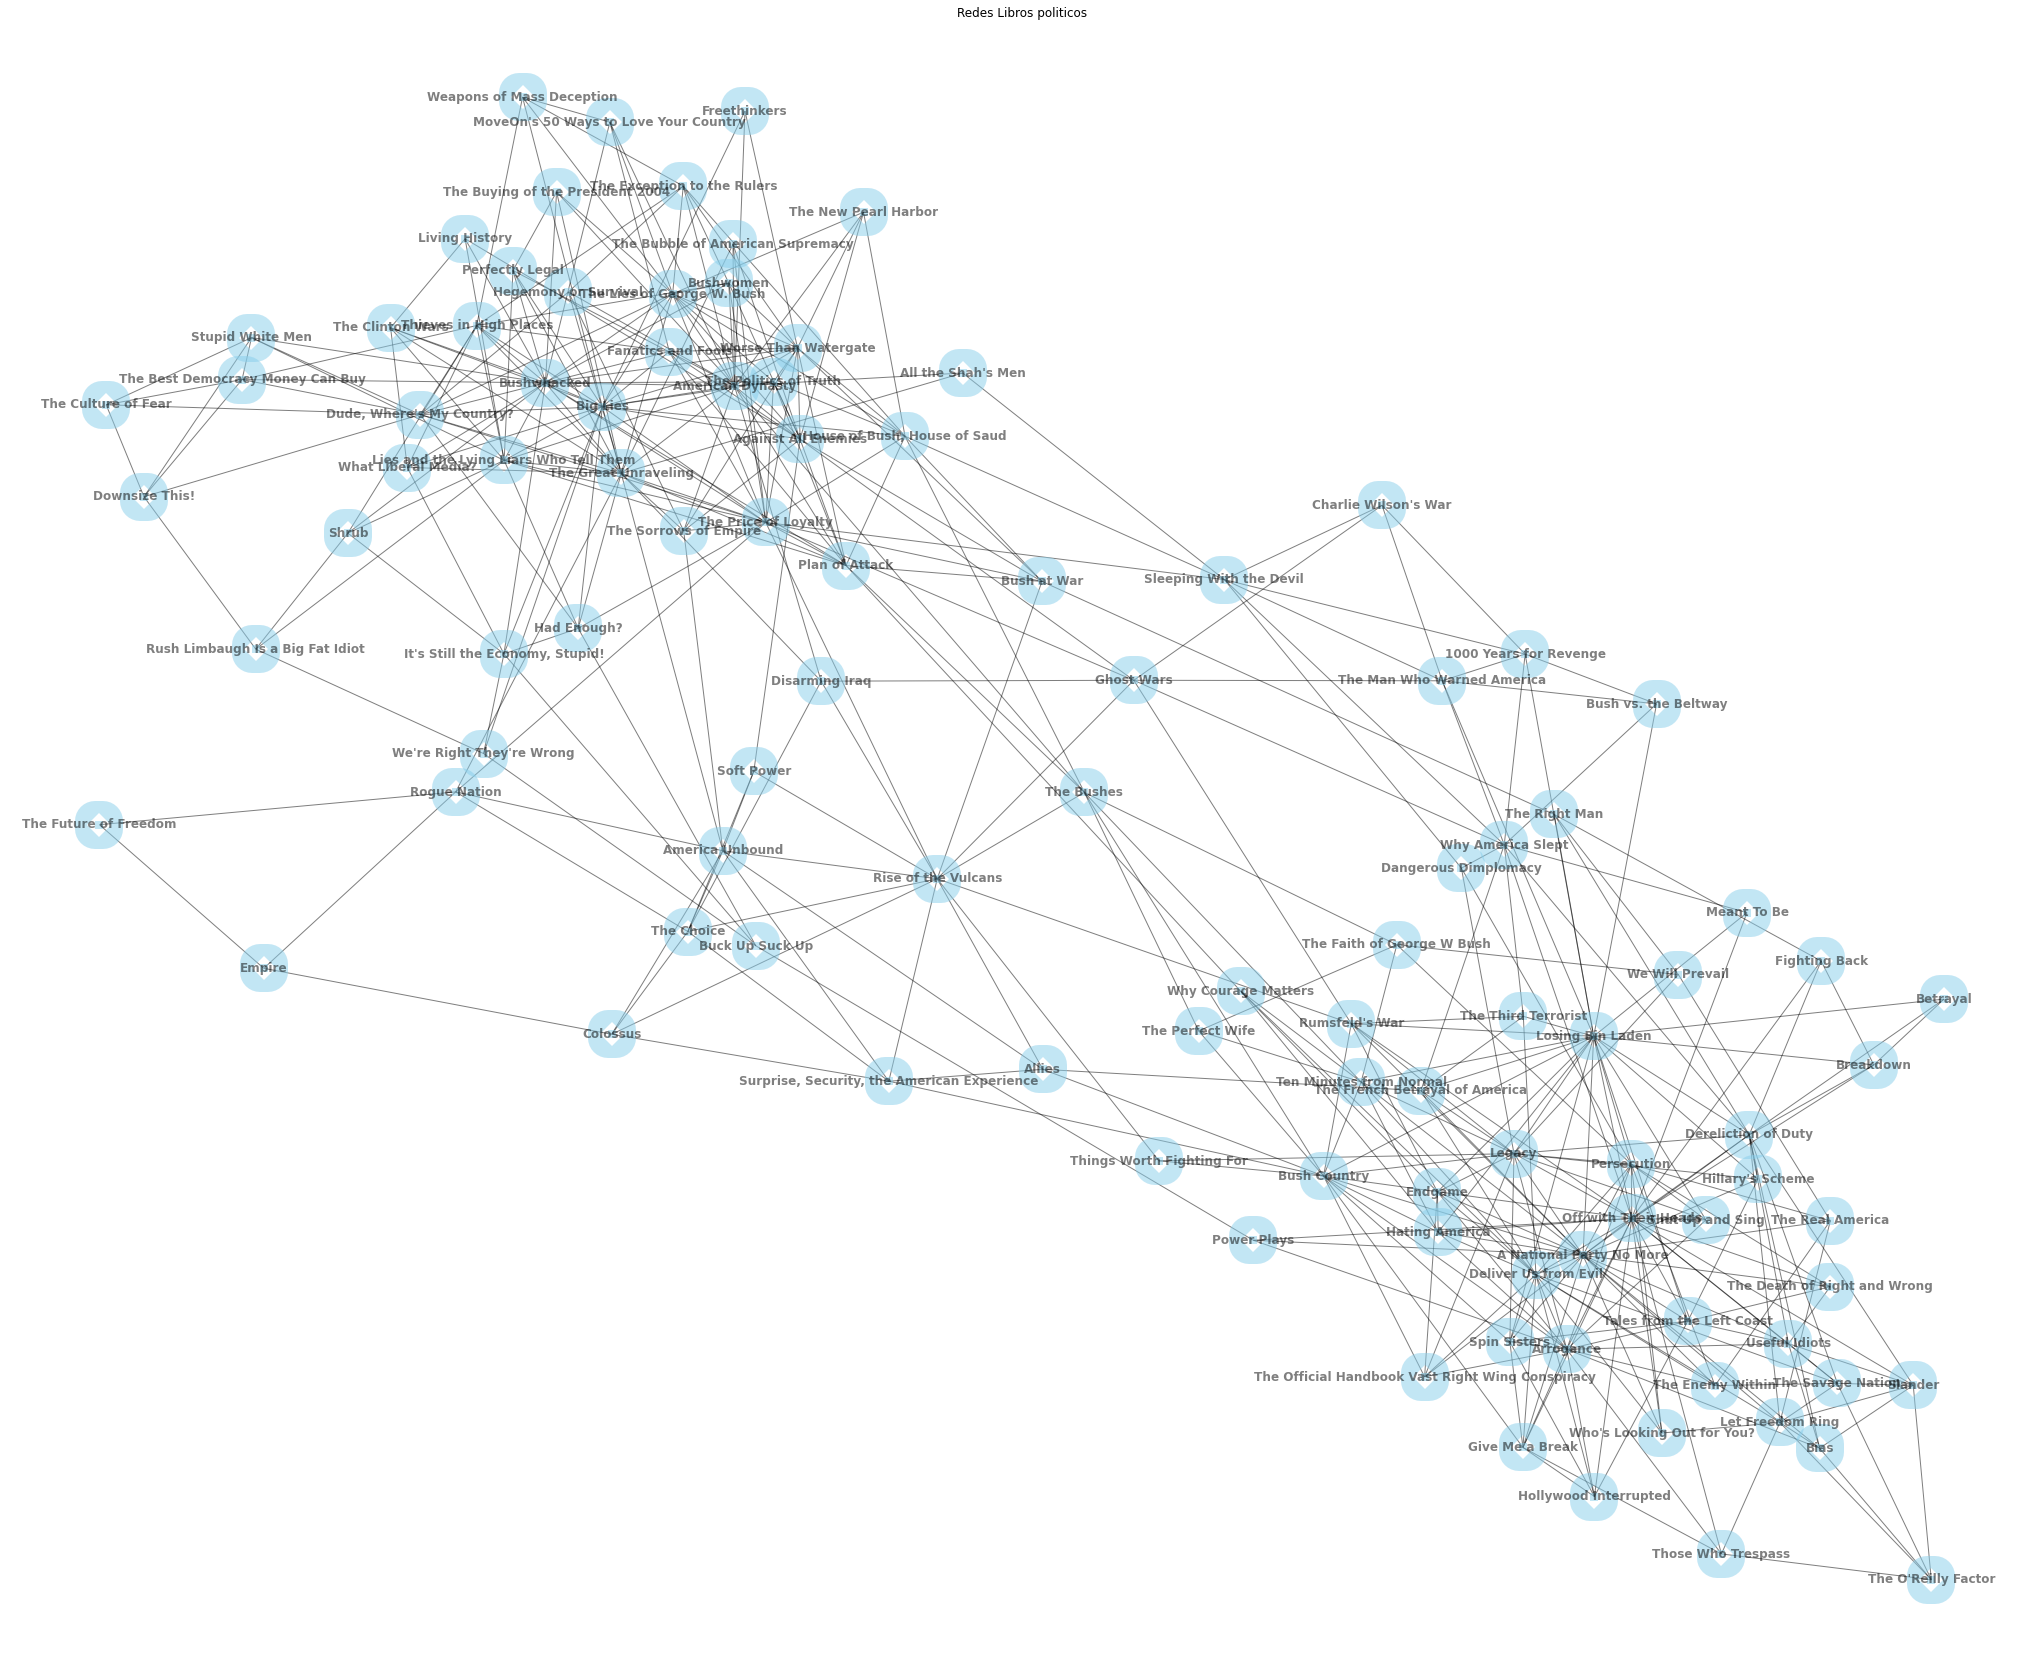

In [5]:
nt = Network('750px', '750px', notebook = True)

plt.figure(figsize=(80,30))# tamaño del cuadrado
plt.subplot(121) 
nx.draw(g, with_labels=True, 
        node_size=60, 
        node_color="skyblue", 
        node_shape="s", 
        alpha=0.5, 
        linewidths=40,
        font_weight='bold',
        arrows =  True,pos=nx.fruchterman_reingold_layout(g))
plt.title("Redes Libros politicos")
plt.show()

###  __Reglas generales descritas__
No cumple con algunas reglas, por ejemplo,  al ser tanta información y al tener tantos enlaces que conectan esos 105 nodos, conlleva a  la oclusión, dado que si observamos esos títulos de libros políticos que se encuentran en el centro de un grupo de patrones no deja que se evidencien correctamente a que libro corresponde, es decir, la oclusión oculta la información, por otra parte también hay un peligro de la distorsión de la perspectiva, dado que también al estar agrupados de esta manera, los enlaces se están cruzando y esto no va a permitir, que se evidencien alguna relación entre libros políticos, por otra parte el texto no es legítimo, es muy clarito y se ve muy chiquito, lo cual, para ciertos libros políticos no se va a entender que son  y por ultimo  hay una alteración de la vista y no se cumple la regla de los ojos le ganan a la memoria.


### __Mejoras posibles, en cuánto a marcas o canales, que le realizaría a la visualización__

Las mejoras que yo le haría a la visualización,  son muy similares a lo que presento Valdis  Krebs, es decir, lo primero que yo haría sería implementarle un canal de color para los libros políticos que correspondes a liberal, conservador y neutro,  lo segundo que yo aria seria implementar un canal de forma , para que estas diferencias sean cada vez más claras   y más entendibles si por ejemplo la persona que está observando esta visualización es  daltónico pueda entenderlo por forma y no tanto por color,  lo tercero que yo haría sería separarlos,  dejar a un lado los libros políticos  liberales, a otro los libros políticos conservadores y en otro los libros políticos  neutro y conjuntamente a esto los ordenaría alfabéticamente para que la búsqueda de cierto libro en particular sea más sencilla, y adicionalmente para agregarle un plus a la visualización  le colocaría  cierto color al enlace que me  haga esa unión entre liberal, conservador y neutro, para saber en esa unión que tipos de libros políticos están relacionados. 


La visualización de Valdis  Krebs de puede observación a continuación, como yo lo mejoraría sería dejar esa visualización pero con unos  cambios que fueron mencionados anteriormente

+ Fuente: (Valdis  Krebs)[http://www.orgnet.com/divided2.html]

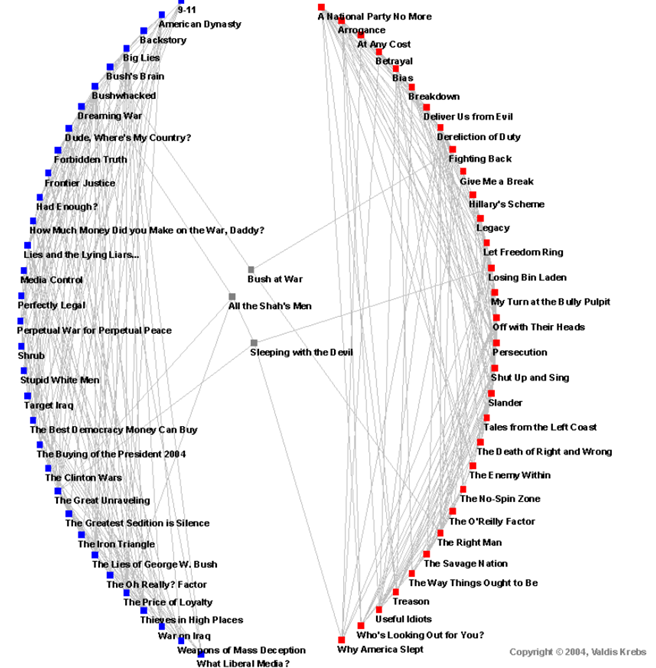

## Gracias

gabriela.cortes@usantotomas.edu.co